In [10]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from gpnotebook.tools.standard_imports import *
from gpnotebook.tools.glycan import decide_glycan_type

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
cancers = cptac_glyco.get_cancer_info()

In [12]:
cancers

{'brca': 'Breast invasive carcinoma',
 'ccrcc': 'Clear cell renal cell carcinoma',
 'coad': 'Colon adenocarcinoma',
 'gbm': 'Glioblastoma multiforme',
 'hnscc': 'Head and Neck squamous cell carcinoma',
 'lscc': 'Lung squamous cell carcinoma',
 'luad': 'Lung adenocarcinoma',
 'ov': 'Ovarian serous cystadenocarcinoma',
 'pdac': 'Pancreatic ductal adenocarcinoma',
 'ucec': 'Uterine Corpus Endometrial Carcinoma'}

In [15]:
counters = []

for cancer in cancers:
    cancer_glycan_counter = cptac_glyco.get_cancer(cancer).count_glycan_types()
    counters.append(cancer_glycan_counter)

df = pd.DataFrame(counters,index = cancers)

/Users/yingweihu/Documents/GitHub/cptac_glyco/cptac_glyco/brca/glycoproteomics_abundance.joblib
/Users/yingweihu/Documents/GitHub/cptac_glyco/cptac_glyco/ccrcc/glycoproteomics_abundance.joblib
/Users/yingweihu/Documents/GitHub/cptac_glyco/cptac_glyco/coad/glycoproteomics_abundance.joblib
/Users/yingweihu/Documents/GitHub/cptac_glyco/cptac_glyco/gbm/glycoproteomics_abundance.joblib
/Users/yingweihu/Documents/GitHub/cptac_glyco/cptac_glyco/hnscc/glycoproteomics_abundance.joblib
/Users/yingweihu/Documents/GitHub/cptac_glyco/cptac_glyco/lscc/glycoproteomics_abundance.joblib
/Users/yingweihu/Documents/GitHub/cptac_glyco/cptac_glyco/luad/glycoproteomics_abundance.joblib
/Users/yingweihu/Documents/GitHub/cptac_glyco/cptac_glyco/ov/glycoproteomics_abundance.joblib
/Users/yingweihu/Documents/GitHub/cptac_glyco/cptac_glyco/pdac/glycoproteomics_abundance.joblib
/Users/yingweihu/Documents/GitHub/cptac_glyco/cptac_glyco/ucec/glycoproteomics_abundance.joblib


In [16]:
df

,F+S,only_S,Other,only_F,HM
brca,9721,5205,1872,5238,1721
ccrcc,10929,7107,5558,13868,6926
coad,2653,1519,643,1781,1210
gbm,3998,2230,863,3153,2408
hnscc,8713,4626,1645,4527,1755
lscc,10637,5312,1480,4279,1657
luad,12270,6444,2171,6079,1719
ov,573,458,497,941,745
pdac,7145,4439,3545,9592,5804
ucec,3718,1968,630,1877,1578


In [20]:
df.iloc[0]

F+S       9721
only_S    5205
Other     1872
only_F    5238
HM        1721
Name: brca, dtype: int64

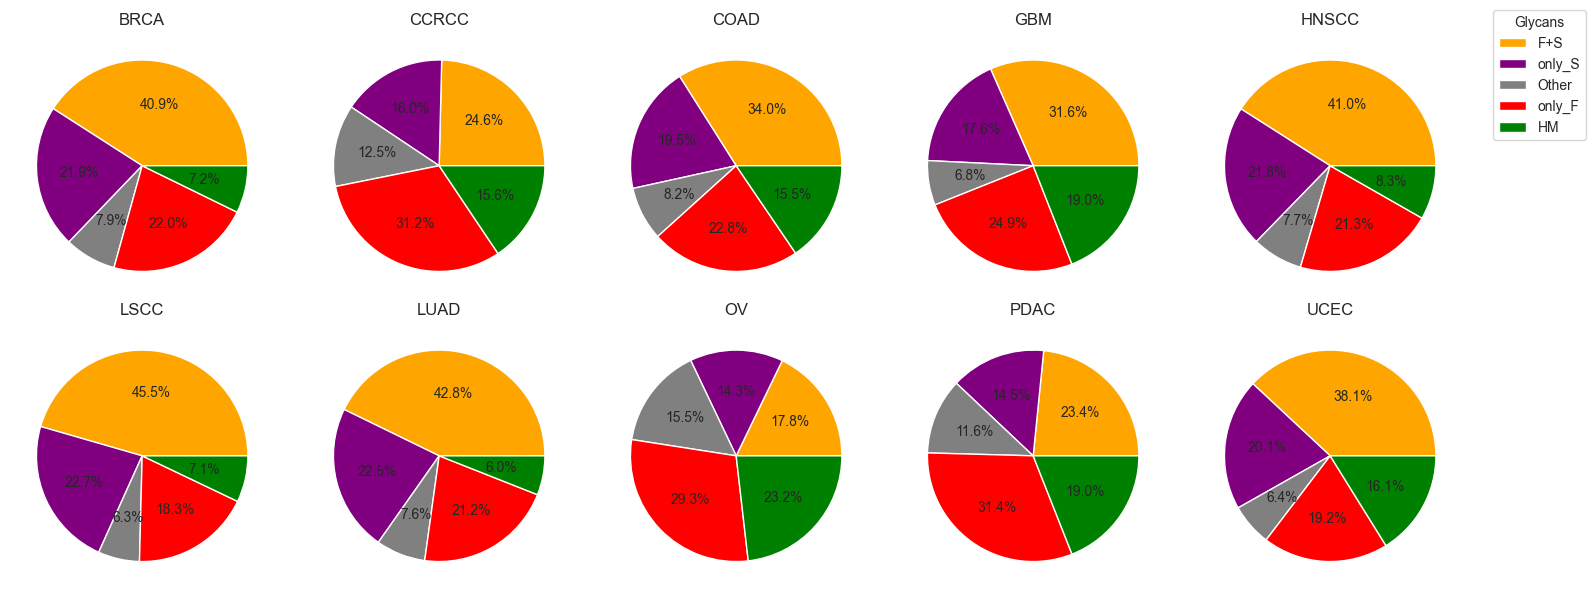

In [35]:


# Create a 2x5 grid of pie charts
fig, axs = plt.subplots(2, 5, figsize=(15, 6))

colors_map = {
    'HM':'green',
    'only_F': 'red',
    'only_S': 'purple',
    'F+S': 'orange',
    'Other': 'grey'
}
labels = list(df.columns.values)
colors = [colors_map.get(i) for i in labels]

for i, ax in enumerate(axs.flat):
    wedges, texts, autotexts = ax.pie(list(df.iloc[i]), autopct='%1.1f%%',colors=colors)
    ax.set_title(f'{str(df.index[i]).upper()}')



# Adding a single shared legend for all pie charts
fig.legend(wedges, labels, title="Glycans", loc='upper left', bbox_to_anchor=(1, 1))



# Adjust layout to prevent overlap
plt.tight_layout()
# plt.show()